In [276]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()

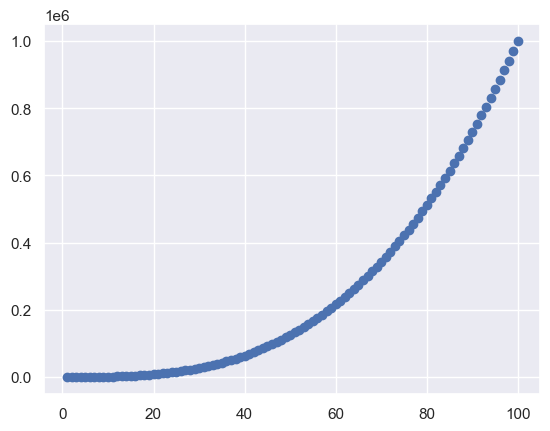

In [277]:
x= np.linspace(1,100,100)
y= x**3 + 4 + np.random.normal(10,np.sqrt(50),size=len(x))
plt.scatter(x,y)

In [278]:
x=x[:,np.newaxis]
y=y[:,np.newaxis]

In [279]:
x1=x.copy()
x.shape[0]

100

In [280]:
x2=np.append(np.ones((x.shape[0],1)),x1,axis=1)
x2

array([[  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       [  1.,   4.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,   7.],
       [  1.,   8.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,  11.],
       [  1.,  12.],
       [  1.,  13.],
       [  1.,  14.],
       [  1.,  15.],
       [  1.,  16.],
       [  1.,  17.],
       [  1.,  18.],
       [  1.,  19.],
       [  1.,  20.],
       [  1.,  21.],
       [  1.,  22.],
       [  1.,  23.],
       [  1.,  24.],
       [  1.,  25.],
       [  1.,  26.],
       [  1.,  27.],
       [  1.,  28.],
       [  1.,  29.],
       [  1.,  30.],
       [  1.,  31.],
       [  1.,  32.],
       [  1.,  33.],
       [  1.,  34.],
       [  1.,  35.],
       [  1.,  36.],
       [  1.,  37.],
       [  1.,  38.],
       [  1.,  39.],
       [  1.,  40.],
       [  1.,  41.],
       [  1.,  42.],
       [  1.,  43.],
       [  1.,  44.],
       [  1.,  45.],
       [  1.,  46.],
       [  1.,  47.],
       [  1.,

In [281]:
Xt = x2.T

In [282]:
# (Xt.X)inv.Xt.y = W
Xt_X=np.dot(Xt,x2)
Xt_X_i=np.linalg.inv(Xt_X)
Xt_y=np.dot(Xt,y)
w=np.dot(Xt_X_i,Xt_y)
w.shape

(2, 1)

In [283]:
w1 = w[1]
w0 = w[0]

In [284]:
y_cap = w0 + x*w1

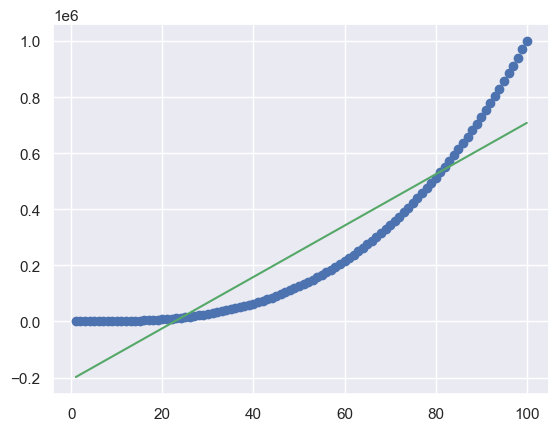

In [285]:
plt.scatter(x,y)
plt.plot(x,y_cap,color = 'g')

In [246]:
theta = w

In [247]:
def predict(theta,x):
    yfit=np.dot(x,theta)
    return yfit


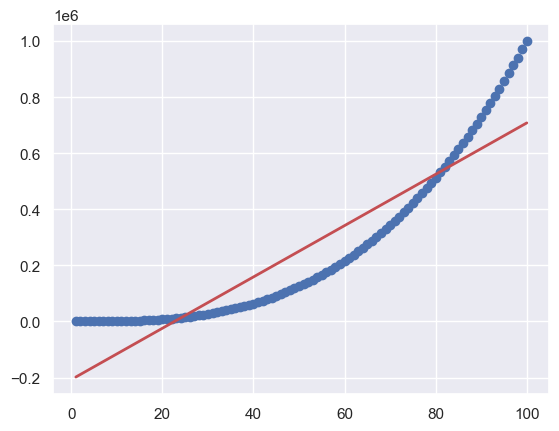

In [248]:
yfit=predict(theta,x2)
plt.scatter(x,y)
plt.plot(x,yfit,'r',linewidth=2)

In [249]:
model=LinearRegression(fit_intercept=True)
model.fit(x,y)

LinearRegression()

In [250]:
xfit=np.linspace(0,100,100)
yfit=model.predict(xfit[:,np.newaxis])

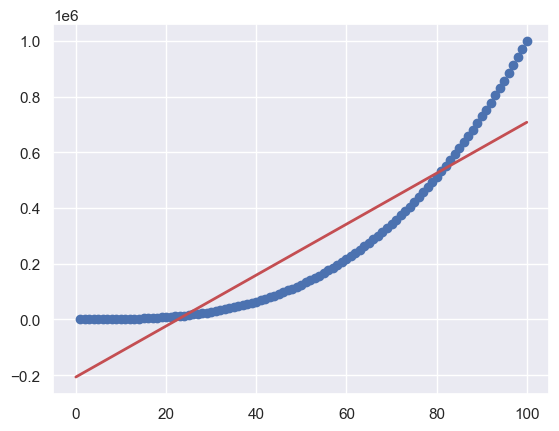

In [251]:
plt.scatter(x,y)
plt.plot(xfit,yfit,'r',linewidth=2)

In [252]:
from sklearn.preprocessing import PolynomialFeatures

In [253]:
poly_features = PolynomialFeatures(degree=2,include_bias = False)
x_poly= poly_features.fit_transform(x2)

In [255]:
model2 = LinearRegression()
model2.fit(x_poly,y)

LinearRegression()

In [256]:
xfit = np.append(np.ones((xfit.shape[0],1)),xfit[:,np.newaxis],axis=1)
x_fit_poly = poly_features.fit_transform(xfit)

In [258]:
y_fit_poly = model2.predict(x_fit_poly)

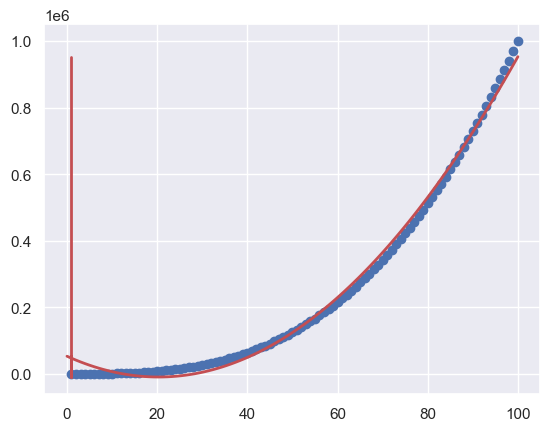

In [259]:
plt.scatter(x,y)
plt.plot(xfit,y_fit_poly,'r',linewidth = 2)

In [230]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [231]:
X,y,coeff = make_regression(n_samples = 100,n_features = 1,n_informative = 1,n_targets = 1 , bias =100.0,effective_rank =None,tail_strength = 0.5,noise = 10.0,shuffle = True,coef = True,random_state = None)

In [232]:
X.shape, y.shape, coeff

((100, 1), (100,), array(63.65787559))

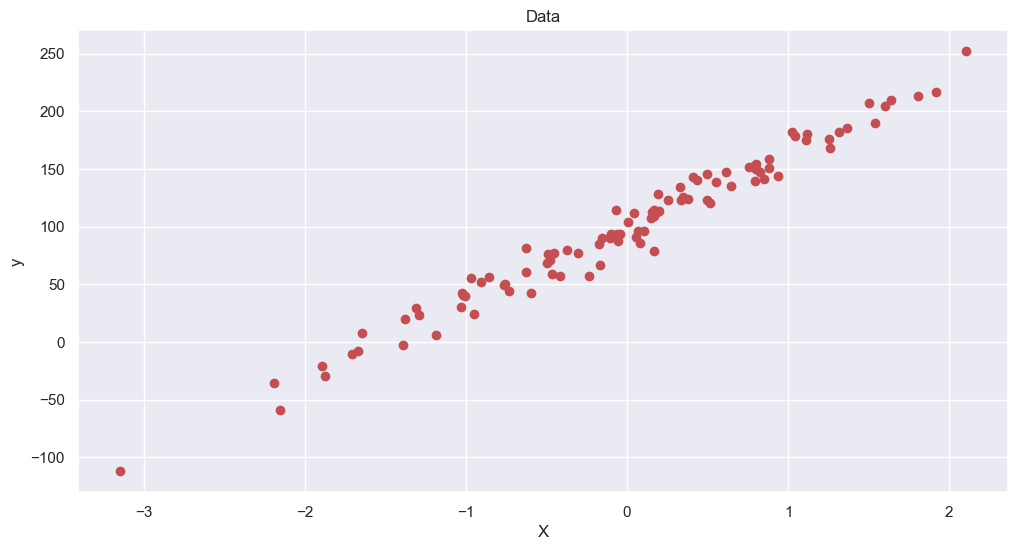

In [233]:
plt.figure(figsize = (12,6))
plt.plot(X,y,'ro')
plt.title('Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [114]:
lm = LinearRegression()

In [115]:
modelnew = lm.fit(X,y)

In [116]:
modelnew.intercept_

99.4902736047664

In [117]:
modelnew.coef_

array([78.22769647])

In [118]:
ypred = modelnew.intercept_+modelnew.coef_[0]*X

Text(0, 0.5, 'y')

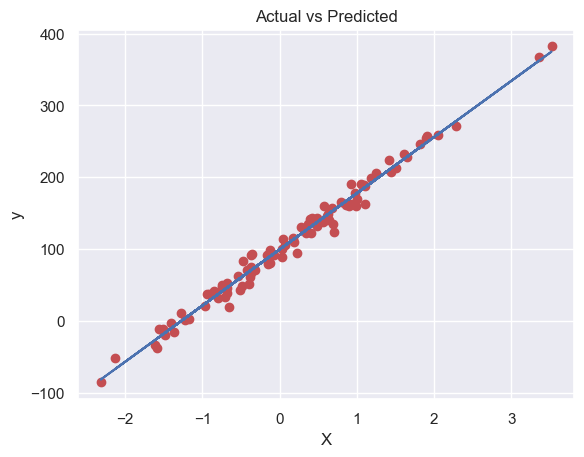

In [119]:
plt.plot(X,y,"ro")
plt.plot(X,ypred)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [121]:
model1 = lm.fit(X_train,y_train)

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [155]:
scores = cross_val_score(model1,X_train,y_train,cv =5)

In [156]:
scores

array([0.99009737, 0.98913197, 0.98618882, 0.9790575 , 0.98286201])

In [157]:
scores.mean(),scores.std()

(0.9854675318092028, 0.004080711704405149)

In [158]:
y_pred = model1.predict(X_test)

In [159]:
y_pred.shape

(40,)

In [160]:
mean_squared_error(y_test,y_pred.flatten())

133.36036669269498

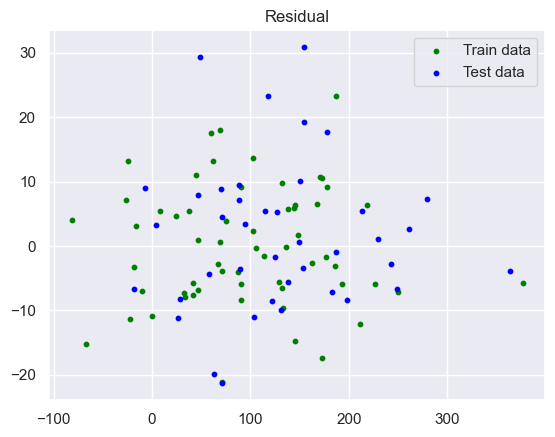

In [215]:
plt.scatter(model1.predict(X_train),
            model1.predict(X_train)-y_train,color = "green",
            s =10,label ='Train data')
plt.scatter(model1.predict(X_test),model1.predict(X_test)-y_test,color='blue',s=10,label='Test data')
plt.title('Residual')
plt.legend(loc = 'upper right')

In [216]:
np.dot(np.transpose(X),y)

array([[4572999.52856121]])

In [217]:
x

array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

In [218]:
y.shape

(100, 1)

In [219]:
x_bias = np.ones((100,1))
x_ = np.reshape(x,(100,1))
x_ = np.append(x_bias,x_,axis=1)

In [220]:
x_transpose = np.transpose(x_)

In [221]:
x_transpose_dot_x = x_transpose.dot(x_)

In [222]:
test1 = np.linalg.inv(x_transpose_dot_x)

In [223]:
test2 = x_transpose.dot(y)

In [224]:
thetas = test1.dot(test2)

In [225]:
thetas

array([[-207058.13910942],
       [   9150.42851208]])

In [226]:
xfit1 = np.linspace(0,100,100)
yfit1 = thetas[0] + xfit1*(thetas[1])

In [227]:
xfit1*thetas[1] + thetas[0]

array([-207058.13910942, -197815.28202651, -188572.4249436 ,
       -179329.56786069, -170086.71077779, -160843.85369488,
       -151600.99661197, -142358.13952906, -133115.28244615,
       -123872.42536324, -114629.56828033, -105386.71119742,
        -96143.85411452,  -86900.99703161,  -77658.1399487 ,
        -68415.28286579,  -59172.42578288,  -49929.56869997,
        -40686.71161706,  -31443.85453415,  -22200.99745125,
        -12958.14036834,   -3715.28328543,    5527.57379748,
         14770.43088039,   24013.2879633 ,   33256.14504621,
         42499.00212912,   51741.85921202,   60984.71629493,
         70227.57337784,   79470.43046075,   88713.28754366,
         97956.14462657,  107199.00170948,  116441.85879239,
        125684.71587529,  134927.5729582 ,  144170.43004111,
        153413.28712402,  162656.14420693,  171899.00128984,
        181141.85837275,  190384.71545566,  199627.57253856,
        208870.42962147,  218113.28670438,  227356.14378729,
        236599.0008702 ,

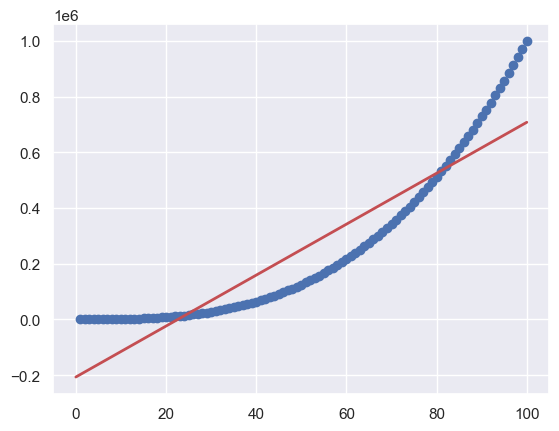

In [228]:
plt.scatter(x,y)
plt.plot(xfit1,yfit1,'r',linewidth = 2)